# Temperature Forecast Project

In [1]:
from IPython.display import Image
Image(url= "https://media.istockphoto.com/vectors/seoul-south-korea-infographic-time-and-date-weather-widgets-template-vector-id494605686")

## Introduction

#### Weather forecasting is the prediction of the state of the atmosphere for a given location using the application of science and technology. This includes temperature, rain, cloudiness, wind speed, and humidity. Weather warnings are a special kind of short-range forecast carried out for the protection of human life. This module explains the details of weather forecasting.

### Details about the dataset

#### 1. station - used weather station number: 1 to 25
#### 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
#### 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
#### 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
#### 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
#### 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
#### 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
#### 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
#### 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
#### 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
#### 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
#### 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
#### 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
#### 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
#### 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
#### 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
#### 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
#### 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
#### 19. lat - Latitude (Â°): 37.456 to 37.645
#### 20. lon - Longitude (Â°): 126.826 to 127.135
#### 21. DEM - Elevation (m): 12.4 to 212.3
#### 22. Slope - Slope (Â°): 0.1 to 5.2
#### 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
#### 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
#### 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [219]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, LassoCV

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### Importing all the necessaries libraries which will help me for model prediction.

#### Loading csv data

#### Now I am going to upload or read the files/data-sets using pandas. For this we used read_csv.

In [220]:
df = pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


#### Loading the the first 5 rows of Flight Price Prediction dataset.

In [221]:
df.shape

(7752, 25)

#### There are altogether 7752 rows and 25 columns in Temperature Forecast Project dataset.

In [222]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Temperature Forecast Project dataset columns are both continous and categorical in nature.
#### There are 1 object type columns and 24 float type columns in dataset.
#### There are missing values in the dataset that will be filled by mean or mode.

In [223]:
df.drop_duplicates(inplace = True)

In [224]:
df.drop('Date',inplace=True,axis=1)

In [225]:
df.shape

(7752, 24)

#### Dropping the Date column as it is of no use.
#### There are no duplicates in the dataset.
#### Now there are 7752 rows and 24 columns in the dataset.

In [226]:
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

#### Almost all the columns are continous in nature only lat,lon,DEM,Slope and station are categorical in nature.

In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


## EDA - Exploratory Data Analysis

## Filling the missing values

In [228]:
# filling the missing values of continious columns
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(),inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(),inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(),inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(),inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(),inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(),inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(),inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(),inplace=True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(),inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(),inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(),inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(),inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)

# filling the missing values of categorical columns
df['station'].fillna(df['station'].mode()[0],inplace=True)

In [229]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

#### Now there are no misisng values or null value in any cloumns.

In [230]:
# Replacing continous columns with mean
df['LDAPS_CC1'] = df['LDAPS_CC1'].replace(0,df['LDAPS_CC1'].mean())
df['LDAPS_CC2'] = df['LDAPS_CC2'].replace(0,df['LDAPS_CC2'].mean())
df['LDAPS_CC3'] = df['LDAPS_CC3'].replace(0,df['LDAPS_CC3'].mean())
df['LDAPS_CC4'] = df['LDAPS_CC4'].replace(0,df['LDAPS_CC4'].mean())
df['LDAPS_PPT1'] = df['LDAPS_PPT1'].replace(0,df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].replace(0,df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].replace(0,df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].replace(0,df['LDAPS_PPT4'].mean())

#### Replaced all the zero values with the help of mean.

In [231]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.373911,...,0.807274,0.468188,0.469273,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.213213,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.257480,...,1.678459,1.117039,1.160633,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000002,...,0.000014,0.000021,0.000017,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.159668,...,0.485003,0.278200,0.269407,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.331365,...,0.485003,0.278200,0.269407,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.485003,0.278200,0.269407,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### There is no zero values in min rows.
#### I can see there is difference between mean and 50% that need to fixit.
#### There are outliers in the datset that i will clear it by using Z Score.

## i) Using Next_Tmax Label for predicting

In [207]:
# Divinding dataset into features and label
y=df['Next_Tmax']
x=df.drop(columns=['Next_Tmax'])

#### Dividing features and label into x and y for model prediction.

### Scatter Plot

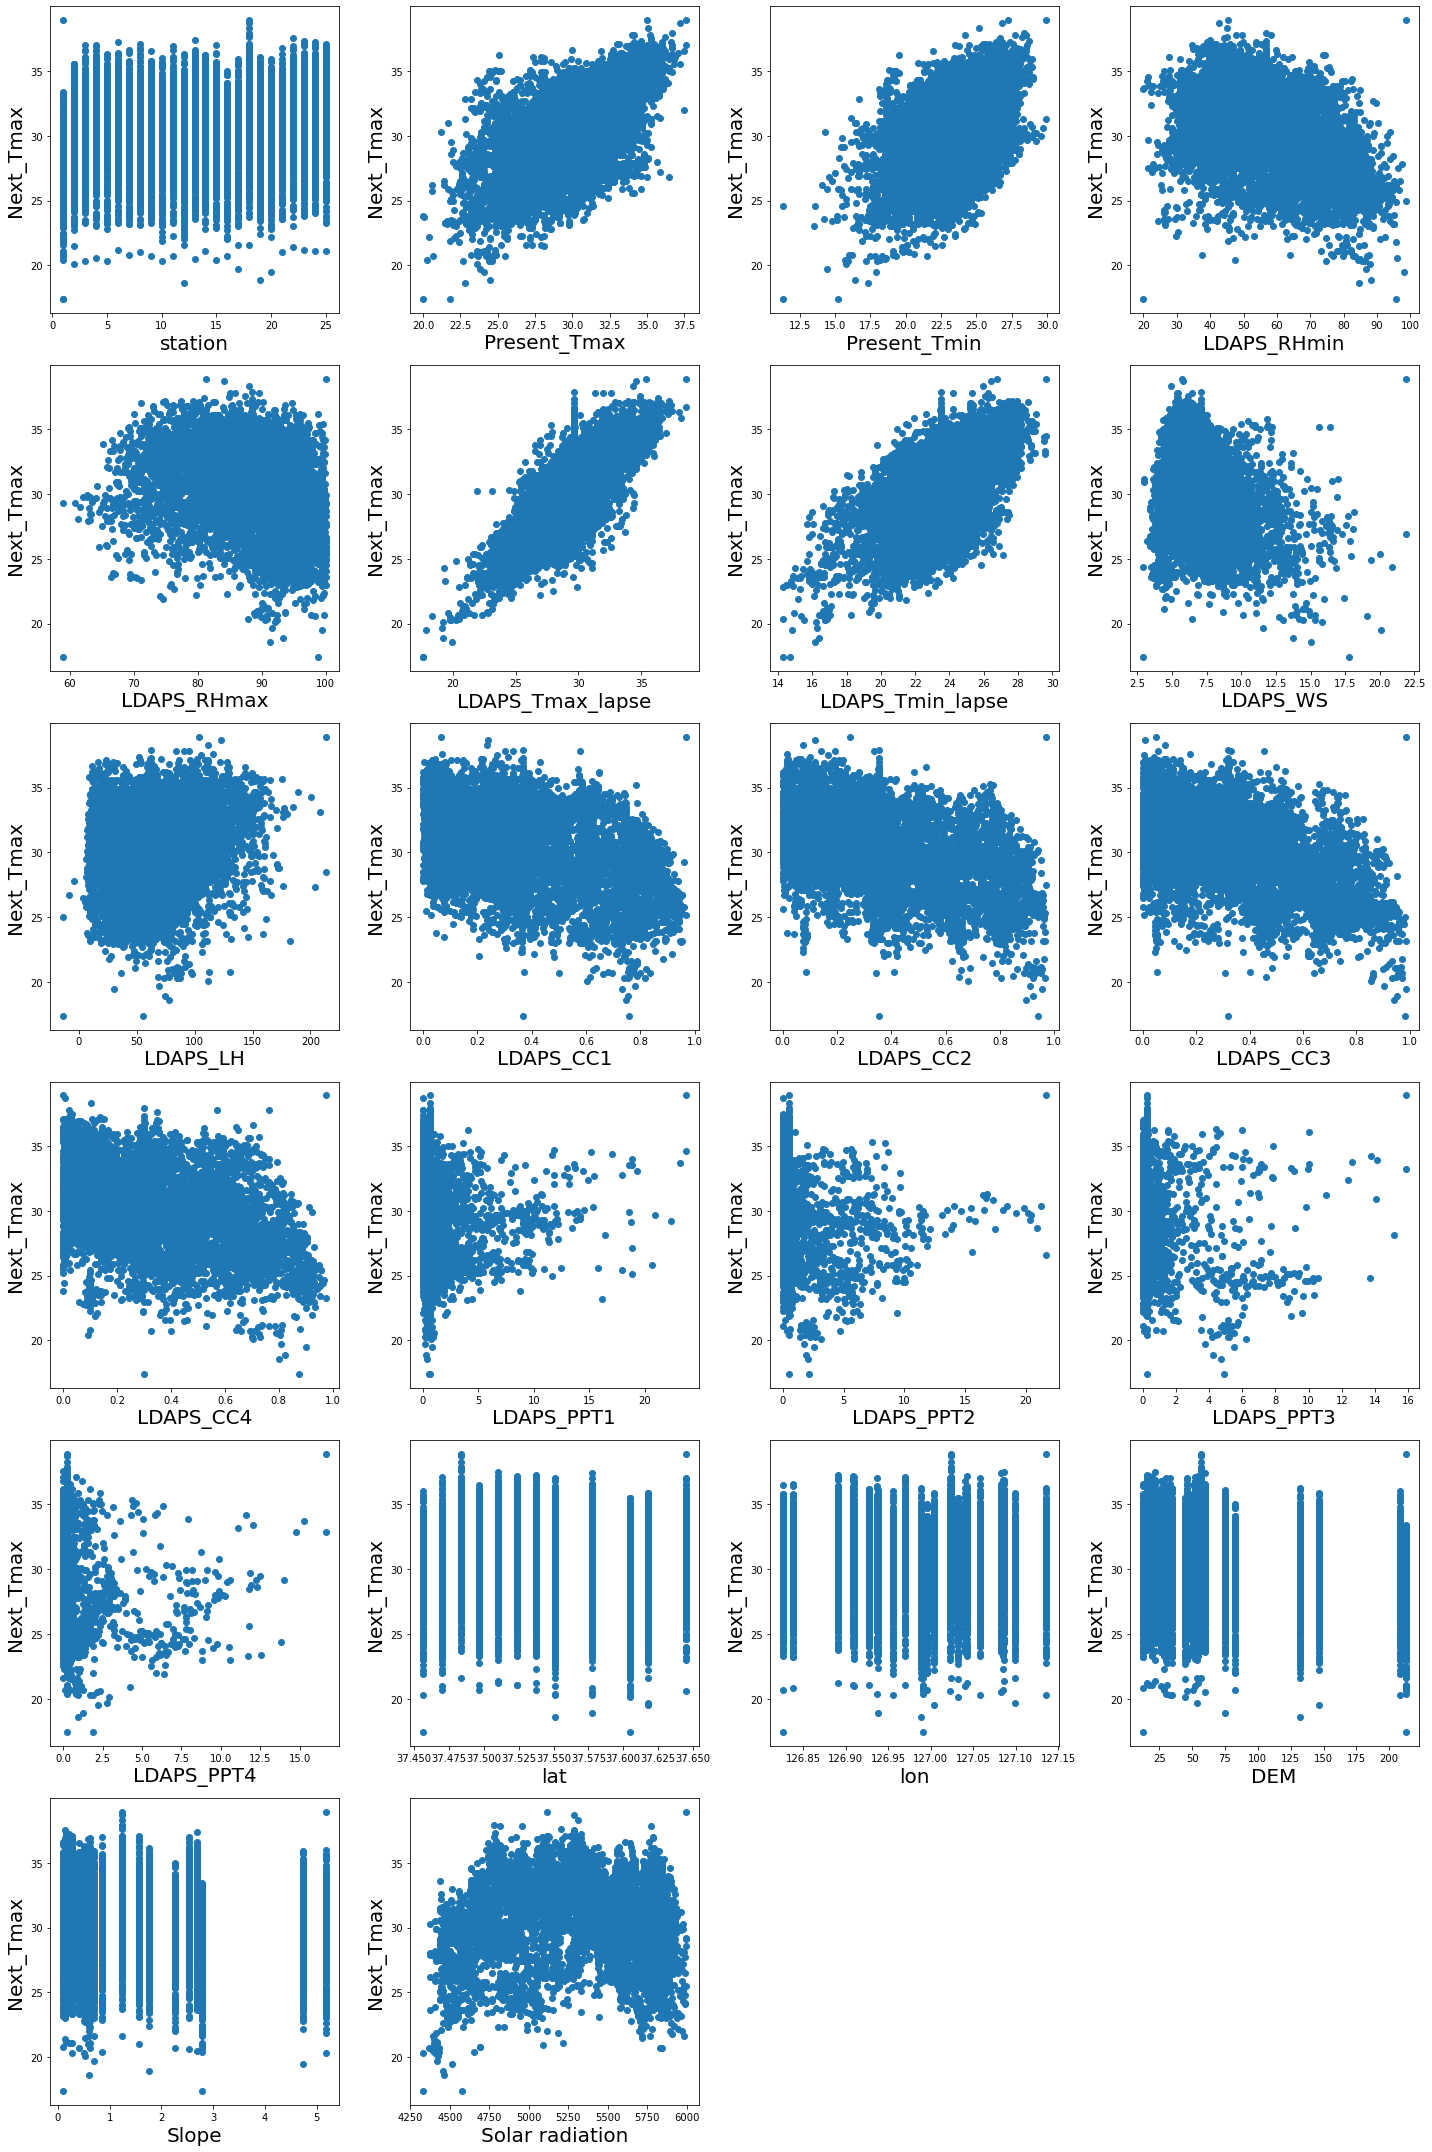

In [208]:
# visualizing the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax = plt.subplot(6,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Next_Tmax',fontsize=20)
        plotnumber +=1 
        plt.tight_layout()  

#### From the above scatter plot i can say that most of the columns are strongly related to label.

### Distribution Plot

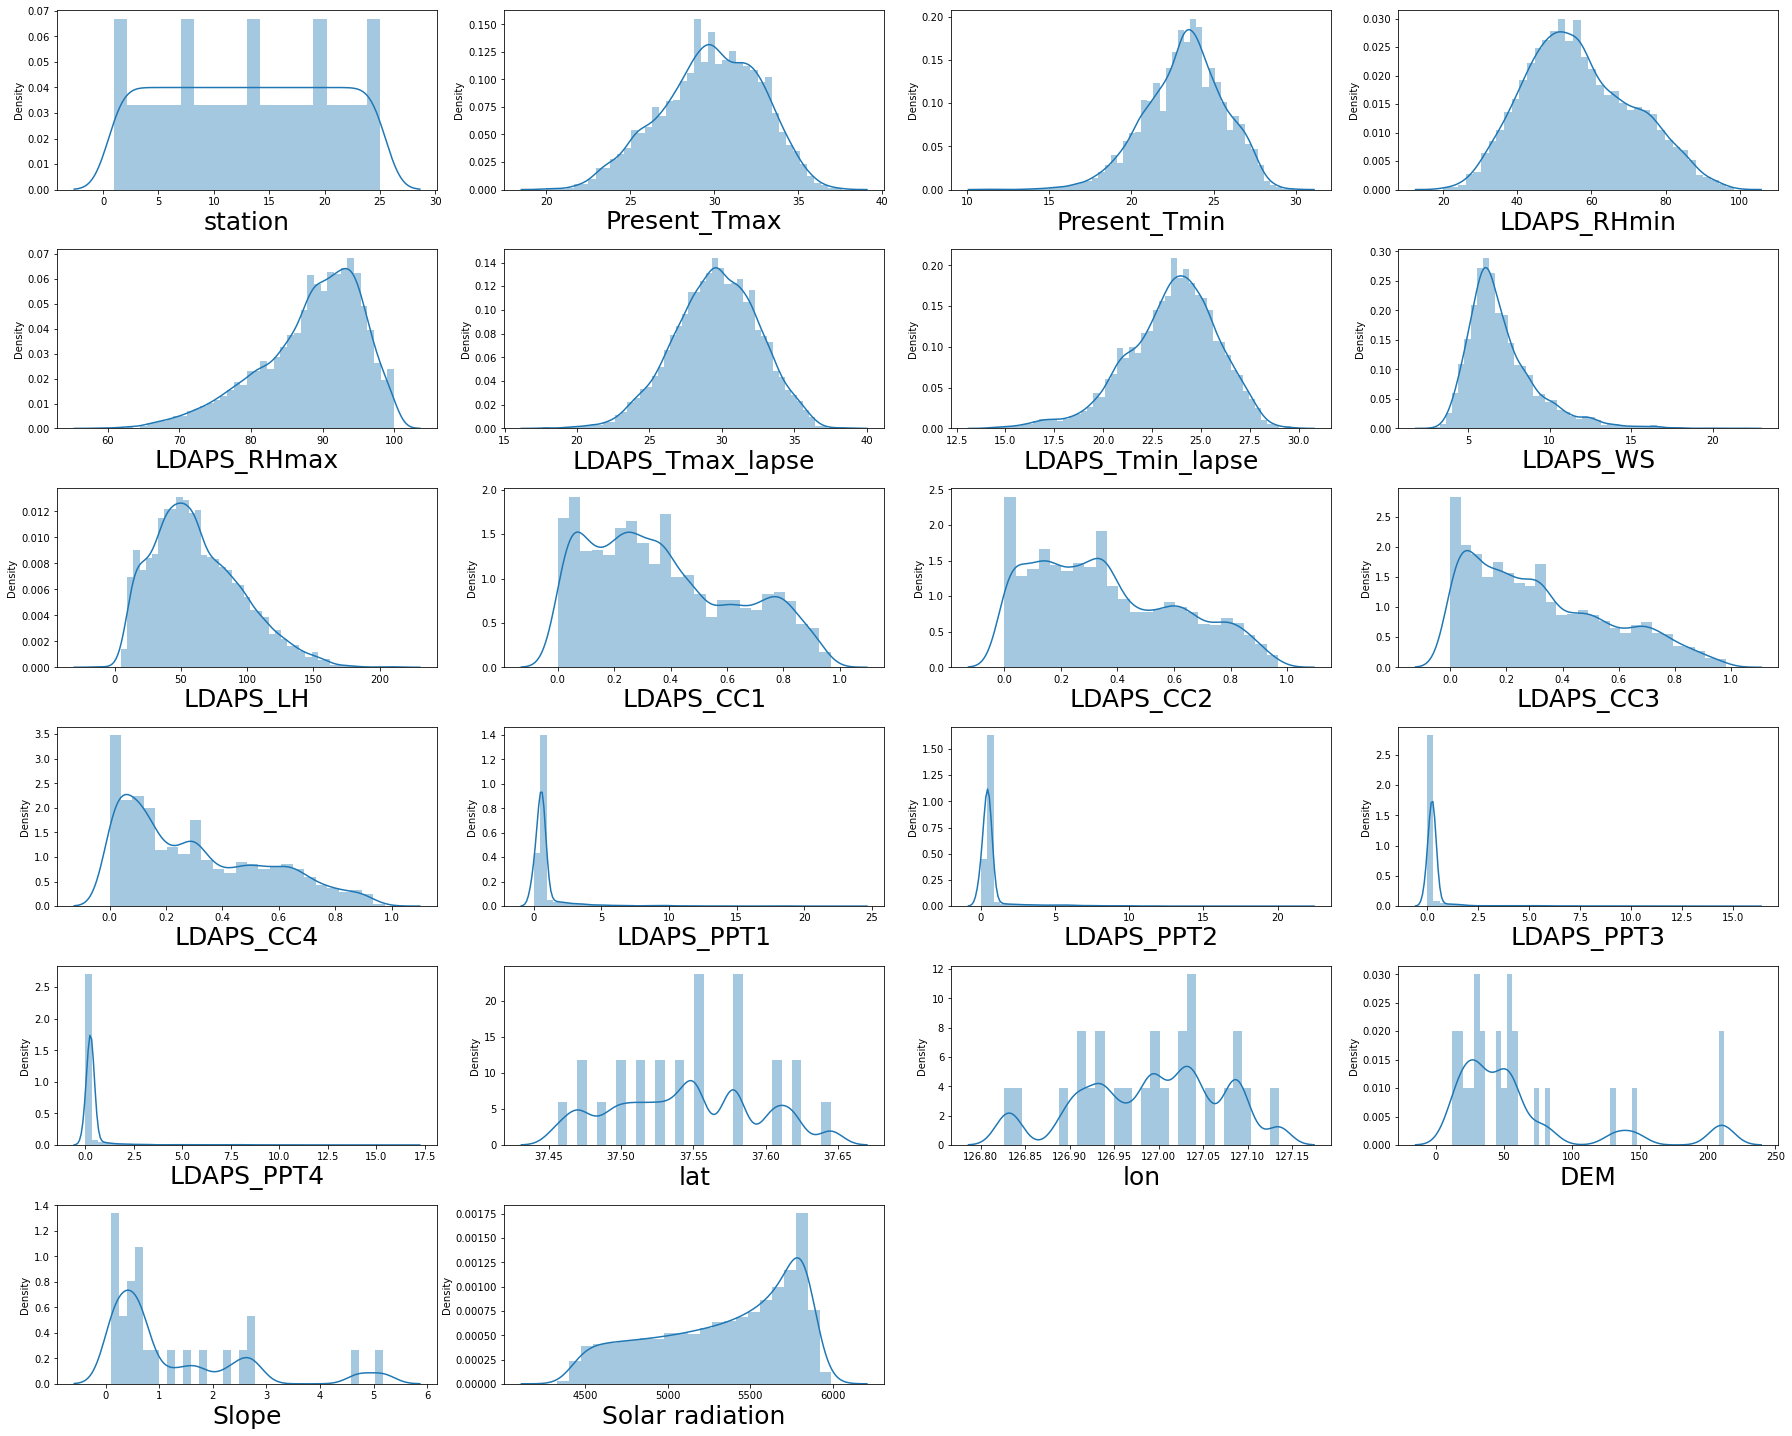

In [209]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### There are skewness in few cloumns that will be fixed soon.

## Box Plot

station                AxesSubplot(0.125,0.772143;0.168478x0.107857)
Present_Tmax        AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Present_Tmin        AxesSubplot(0.529348,0.772143;0.168478x0.107857)
LDAPS_RHmin         AxesSubplot(0.731522,0.772143;0.168478x0.107857)
LDAPS_RHmax            AxesSubplot(0.125,0.642714;0.168478x0.107857)
LDAPS_Tmax_lapse    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
LDAPS_Tmin_lapse    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
LDAPS_WS            AxesSubplot(0.731522,0.642714;0.168478x0.107857)
LDAPS_LH               AxesSubplot(0.125,0.513286;0.168478x0.107857)
LDAPS_CC1           AxesSubplot(0.327174,0.513286;0.168478x0.107857)
LDAPS_CC2           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
LDAPS_CC3           AxesSubplot(0.731522,0.513286;0.168478x0.107857)
LDAPS_CC4              AxesSubplot(0.125,0.383857;0.168478x0.107857)
LDAPS_PPT1          AxesSubplot(0.327174,0.383857;0.168478x0.107857)
LDAPS_PPT2          AxesSubplot(0.

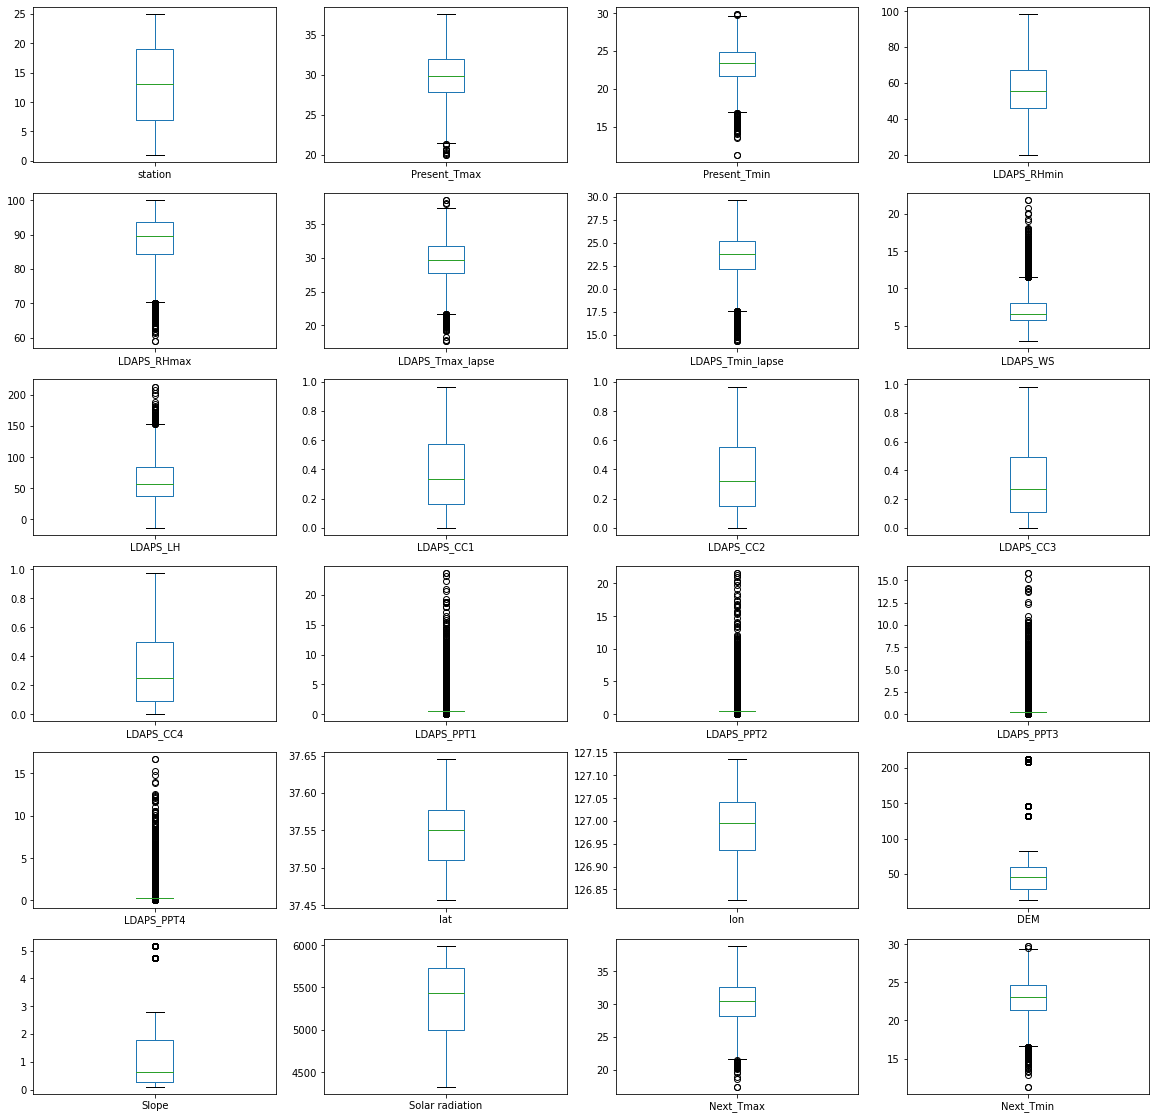

In [210]:
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20))

#### There are outliers in that dataset that i will fixed it by Z Score

## Z score

In [211]:
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(6908, 24)

#### After applying Z score i can see that there are 6908 rows and 24 columns in dataset.

In [212]:
# find correlation of features vs target using corrwith

df.drop('Next_Tmax',axis=1).corrwith(df.Next_Tmax)

station             0.105106
Present_Tmax        0.585181
Present_Tmin        0.444685
LDAPS_RHmin        -0.427650
LDAPS_RHmax        -0.299805
LDAPS_Tmax_lapse    0.805432
LDAPS_Tmin_lapse    0.538857
LDAPS_WS           -0.276965
LDAPS_LH            0.172685
LDAPS_CC1          -0.455063
LDAPS_CC2          -0.485326
LDAPS_CC3          -0.481657
LDAPS_CC4          -0.420266
LDAPS_PPT1         -0.156618
LDAPS_PPT2         -0.119099
LDAPS_PPT3         -0.047899
LDAPS_PPT4         -0.087755
lat                -0.045941
lon                 0.008520
DEM                -0.152845
Slope              -0.085377
Solar radiation    -0.032497
Next_Tmin           0.584801
dtype: float64

## Visualize the correlation

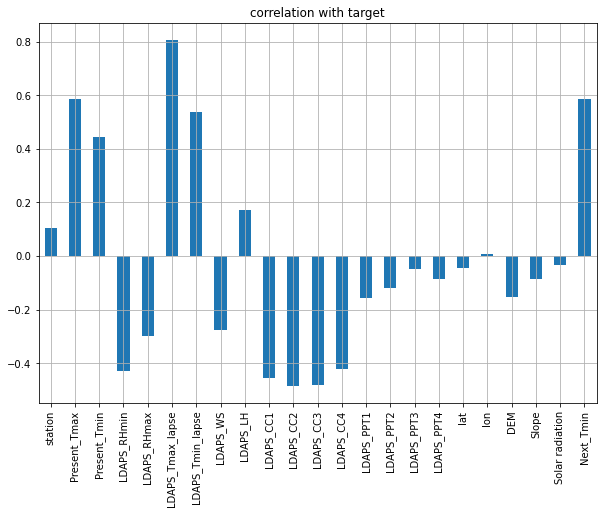

In [213]:
df.drop('Next_Tmax',axis=1).corrwith(df.Next_Tmax).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 7 columns are positively related to target value.

## StandardScaler

In [214]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66329184, -0.36132577, -0.75952931, ...,  1.11500407,
         1.51793488, -0.6975993 ],
       [-1.52464842,  0.72108401, -0.6762959 , ..., -0.54215762,
         1.22994952, -0.17406357],
       [-1.38600499,  0.61960809,  0.03118815, ..., -0.7231326 ,
         1.21653443,  0.38974413],
       ...,
       [ 1.66415031, -2.22171758, -2.42419767, ..., -0.71933797,
        -2.0743251 , -2.2279345 ],
       [-1.66329184, -3.30412736, -4.9628169 , ..., -0.8454552 ,
        -2.35821196, -4.68452522],
       [-1.66329184,  2.64912642,  2.77789093, ...,  2.86143459,
         1.51793488,  2.76579089]])

#### Applying the standard scaler to scaled the dataset in one range.

### VIF - variance inflation factor

In [215]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.229075,station
1,2.773543,Present_Tmax
2,3.479177,Present_Tmin
3,6.357583,LDAPS_RHmin
4,2.192886,LDAPS_RHmax
5,7.532260,LDAPS_Tmax_lapse
6,9.081873,LDAPS_Tmin_lapse
7,1.267791,LDAPS_WS
8,1.514096,LDAPS_LH
9,3.130169,LDAPS_CC1


#### None of the features vif score value is above 10. So i can say that Multicollinearity doesn't exist.

# Model Building

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset.

## Linear Regression model

In [217]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [218]:
# adjusted r2 score
rg.score(x_train,y_train)

0.7915016774724632

In [84]:
rg.score(x_test,y_test)

0.799062706926219

In [85]:
y_pred = rg.predict(x_test)
y_pred

array([31.22596718, 34.0380778 , 25.70468773, ..., 29.19615964,
       31.58098931, 31.48128835])

### Scatter plot of Linear Regression

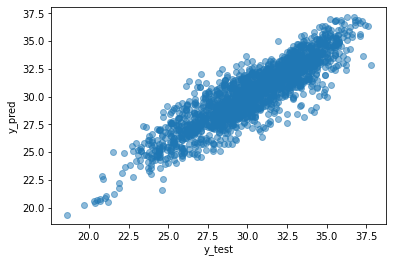

In [86]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [87]:
mean_squared_error(y_test,y_pred)

2.0133668237329707

### RMSE

In [88]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4189315782422247

### r2 score

In [89]:
r2_score(y_test,y_pred)

0.799062706926219

### Linear Regression model - 79.90%

## Random Forest Regressor Model

In [90]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [91]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9856139126394012

In [92]:
rf.score(x_test,y_test)

0.9077692454629416

In [93]:
y_pred = rf.predict(x_test)
y_pred

array([30.95      , 34.451     , 25.193     , ..., 31.33574887,
       31.481     , 30.62274887])

### Scatter plot of Random Forest Regressor Model

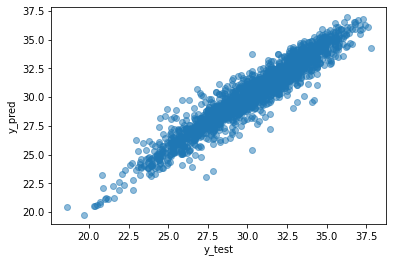

In [94]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [95]:
mean_squared_error(y_test,y_pred)

0.9241407529292657

### RMSE

In [96]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9613223980170573

### r2 score

In [97]:
r2_score(y_test,y_pred)

0.9077692454629416

### Random Forest Regressor Model 90.7%

## Decision Tree Regressor Model

In [98]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [99]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [100]:
dt.score(x_test,y_test)

0.8052676899450484

In [101]:
y_pred = dt.predict(x_test)
y_pred

array([29.5, 33.9, 25.4, ..., 32.5, 31.3, 31.9])

### Scatter plot of Decision Tree Regressor Model

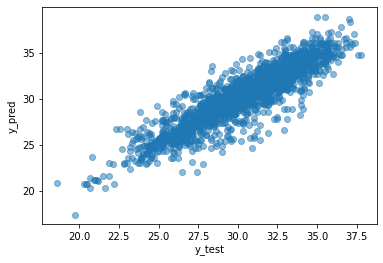

In [102]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [103]:
mean_squared_error(y_test,y_pred)

1.9511936613456853

### RMSE

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.3968513383125942

### r2 score

In [105]:
r2_score(y_test,y_pred)

0.8052676899450484

### Decision Tree Regressor Model - 80.52%

## AdaBoost Regressor

In [107]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [108]:
# adjusted r2 score
ada.score(x_train,y_train)

0.775914961719921

In [109]:
ada.score(x_test,y_test)

0.7762574998721702

In [110]:
y_pred = ada.predict(x_test)
y_pred

array([30.11858585, 32.6921329 , 27.24797952, ..., 29.7363126 ,
       31.76638225, 30.63200456])

### Scatter plot of AdaBoost Regressor

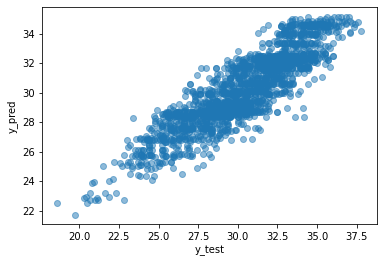

In [111]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [112]:
mean_squared_error(y_test,y_pred)

2.24187217775963

### RMSE

In [113]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4972882747686331

### r2 score

In [114]:
r2_score(y_test,y_pred)

0.7762574998721702

### AdaBoost Regressor Model - 77.62%

### Hyperparameter Tuning in Random Forest Regressor Model

#### Using RandomizedSearchCV method for improving the r2 score

In [115]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [116]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [117]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [118]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [120]:
prediction = rf_random.predict(x_test)

### Scatter Plot

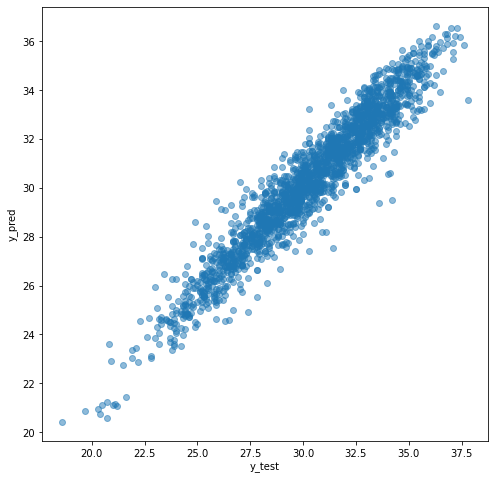

In [121]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [122]:
mean_squared_error(y_test,y_pred)

2.24187217775963

### RMSE

In [123]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4972882747686331

### r2 score

In [124]:
r2_score(y_test,y_pred)

0.7762574998721702

#### Random Forest Regressor is the best model as r2 score is 90.7% but when i have tried the hyper parameter tuning to improve r2 score, it is working adverse as it reducing the accuracy score.So i will not include randomised seach cv prediction r2 score for model prediction.

### Regularization

In [125]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [126]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [127]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

3.363241144056557e-05

In [128]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.363241144056557e-05)

In [129]:
lasso_reg.score(x_test,y_test)

0.7990641382262869

## Saving the Best Model

In [130]:
import pickle

In [131]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model is Random Forest Accuracy Score.
#### So I will Save the Random Forest Regressor as the Best Model.

## ii) Using Next_Tmin Label for predicting

In [232]:
# Divinding dataset into features and label
y=df['Next_Tmin']
x=df.drop(columns=['Next_Tmin'])

#### Dividing features and label into x and y for model prediction.

### Scatter Plot

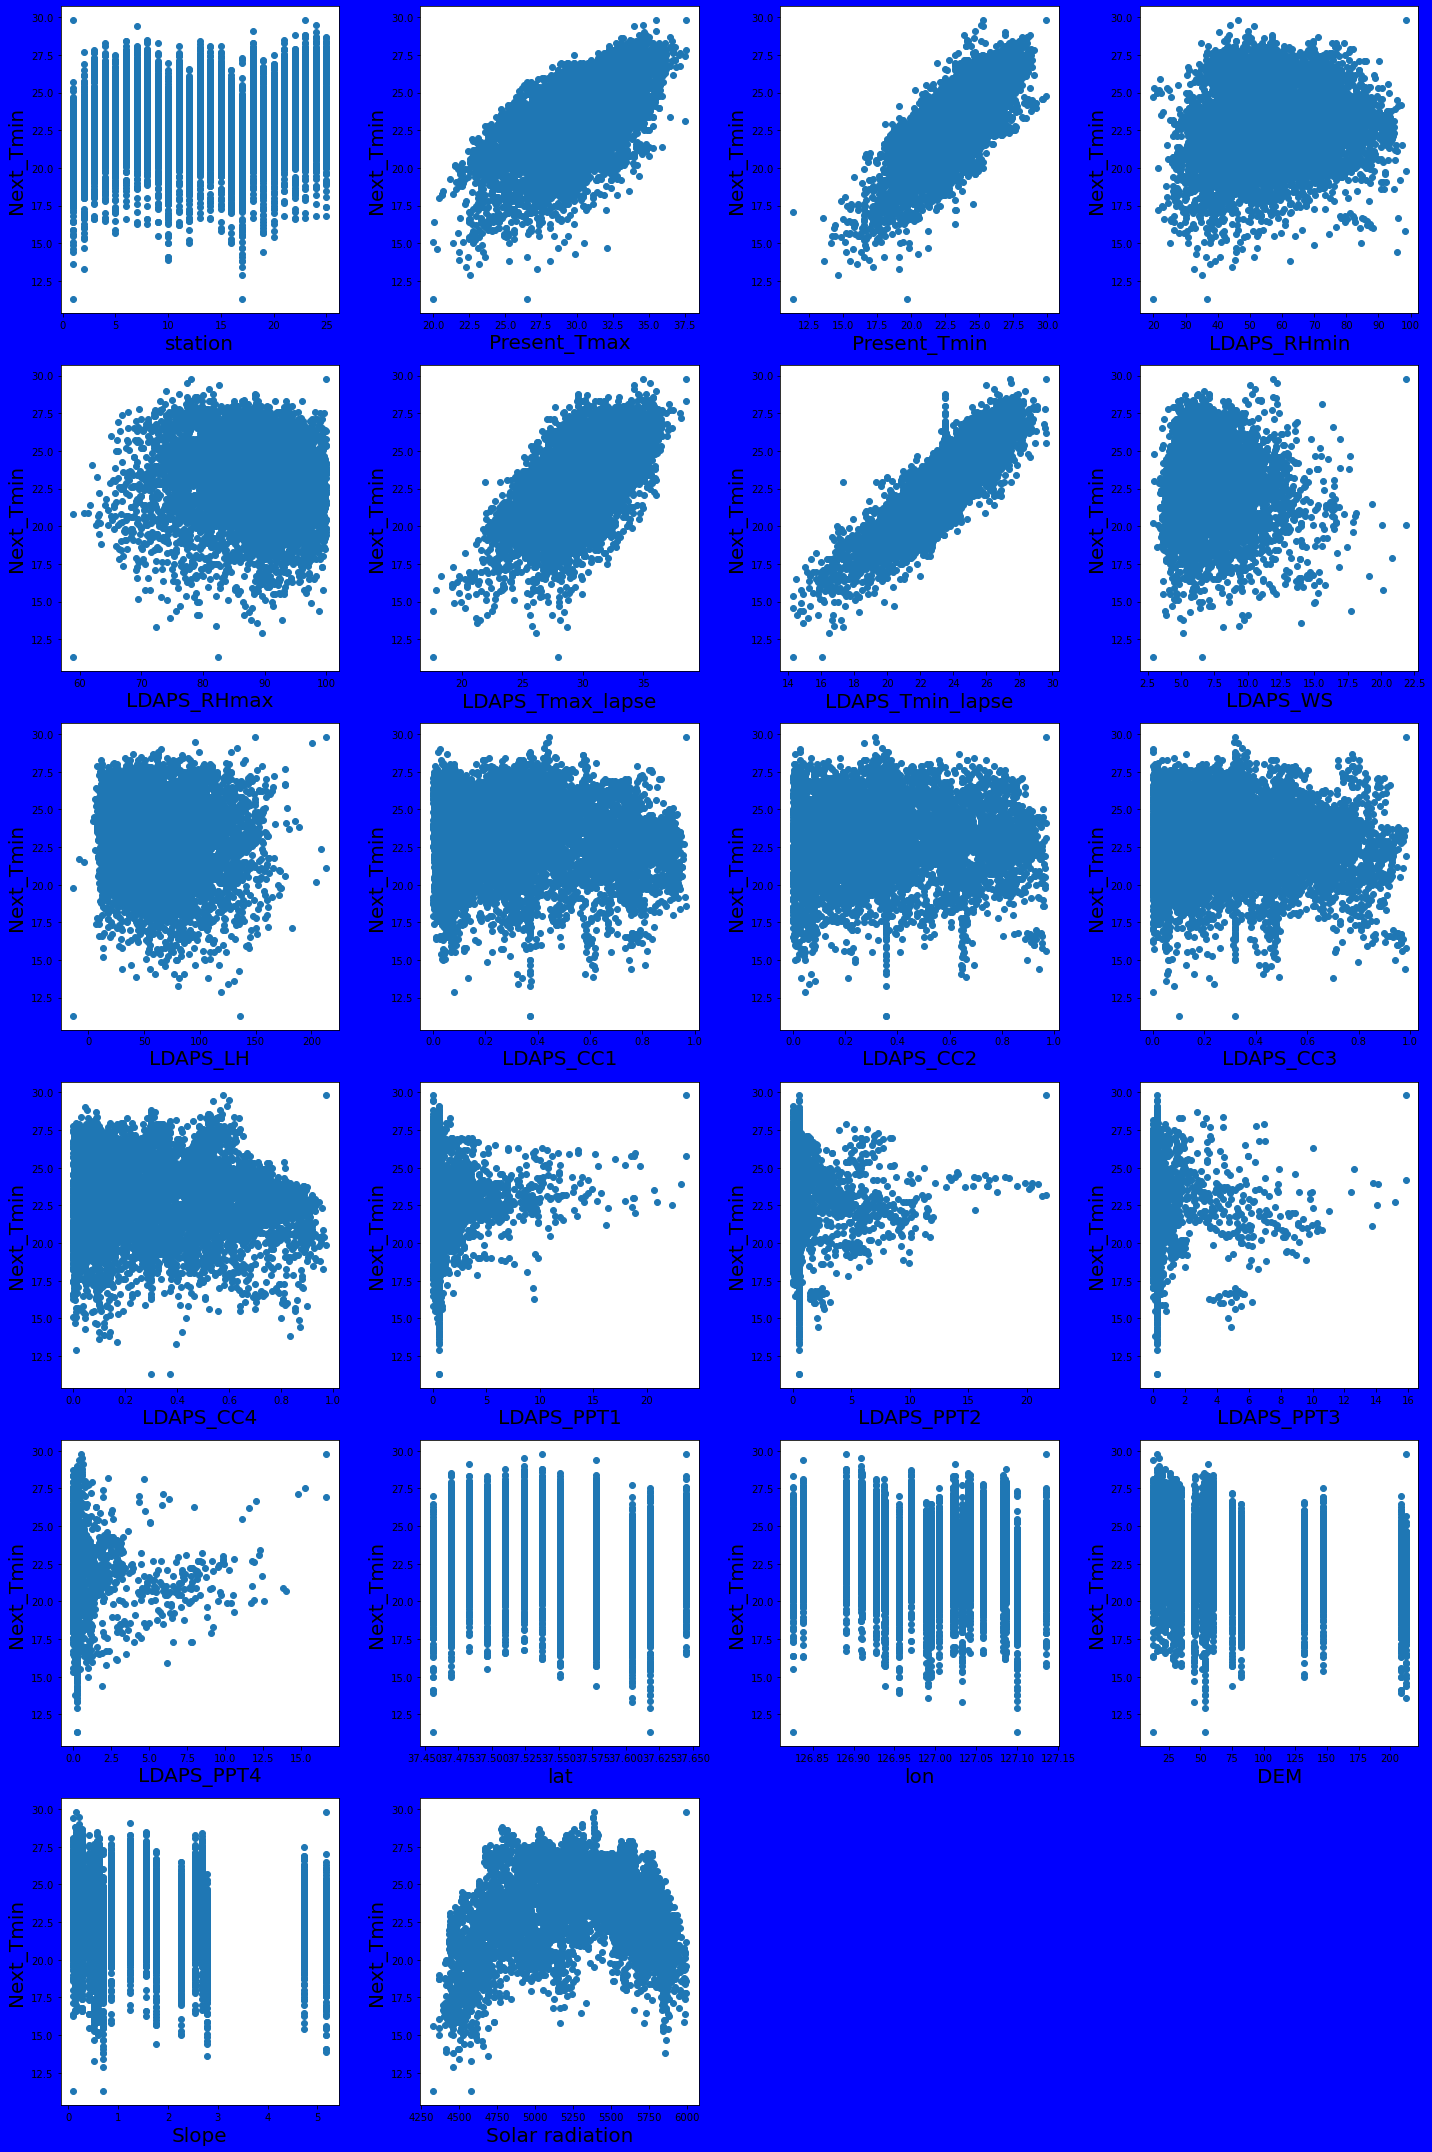

In [233]:
# visualizing the relationship
plt.figure(figsize=(20,30),facecolor='blue')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax = plt.subplot(6,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Next_Tmin',fontsize=20)
        plotnumber +=1 
        plt.tight_layout()  

#### From the above scatter plot i can say that most of the columns are strongly related to label.

### Distribution Plot

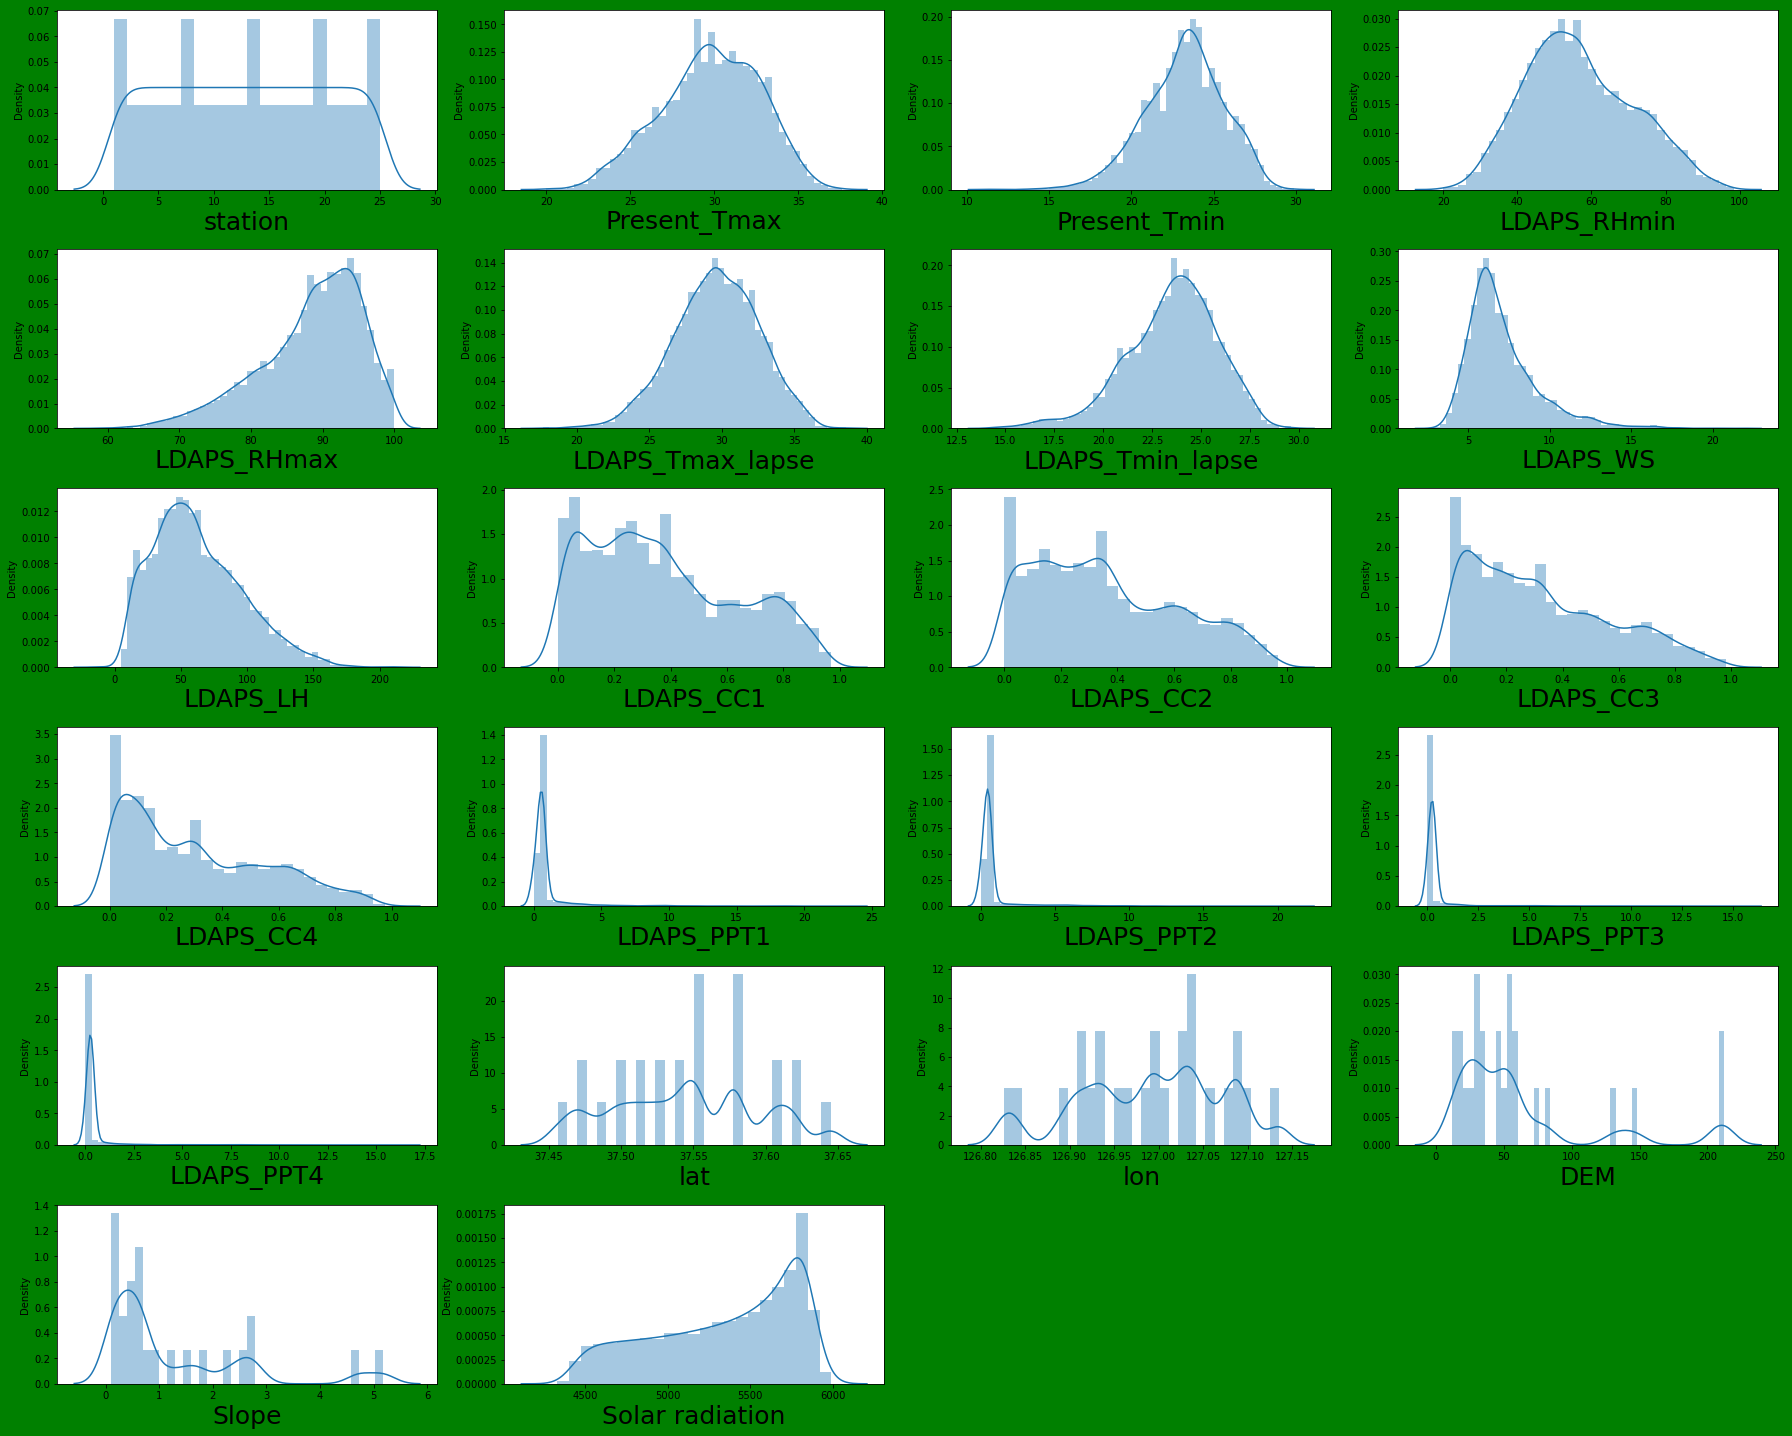

In [234]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### There are skewness in few cloumns that will be fixed soon.

### Box Plot

station                AxesSubplot(0.125,0.772143;0.168478x0.107857)
Present_Tmax        AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Present_Tmin        AxesSubplot(0.529348,0.772143;0.168478x0.107857)
LDAPS_RHmin         AxesSubplot(0.731522,0.772143;0.168478x0.107857)
LDAPS_RHmax            AxesSubplot(0.125,0.642714;0.168478x0.107857)
LDAPS_Tmax_lapse    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
LDAPS_Tmin_lapse    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
LDAPS_WS            AxesSubplot(0.731522,0.642714;0.168478x0.107857)
LDAPS_LH               AxesSubplot(0.125,0.513286;0.168478x0.107857)
LDAPS_CC1           AxesSubplot(0.327174,0.513286;0.168478x0.107857)
LDAPS_CC2           AxesSubplot(0.529348,0.513286;0.168478x0.107857)
LDAPS_CC3           AxesSubplot(0.731522,0.513286;0.168478x0.107857)
LDAPS_CC4              AxesSubplot(0.125,0.383857;0.168478x0.107857)
LDAPS_PPT1          AxesSubplot(0.327174,0.383857;0.168478x0.107857)
LDAPS_PPT2          AxesSubplot(0.

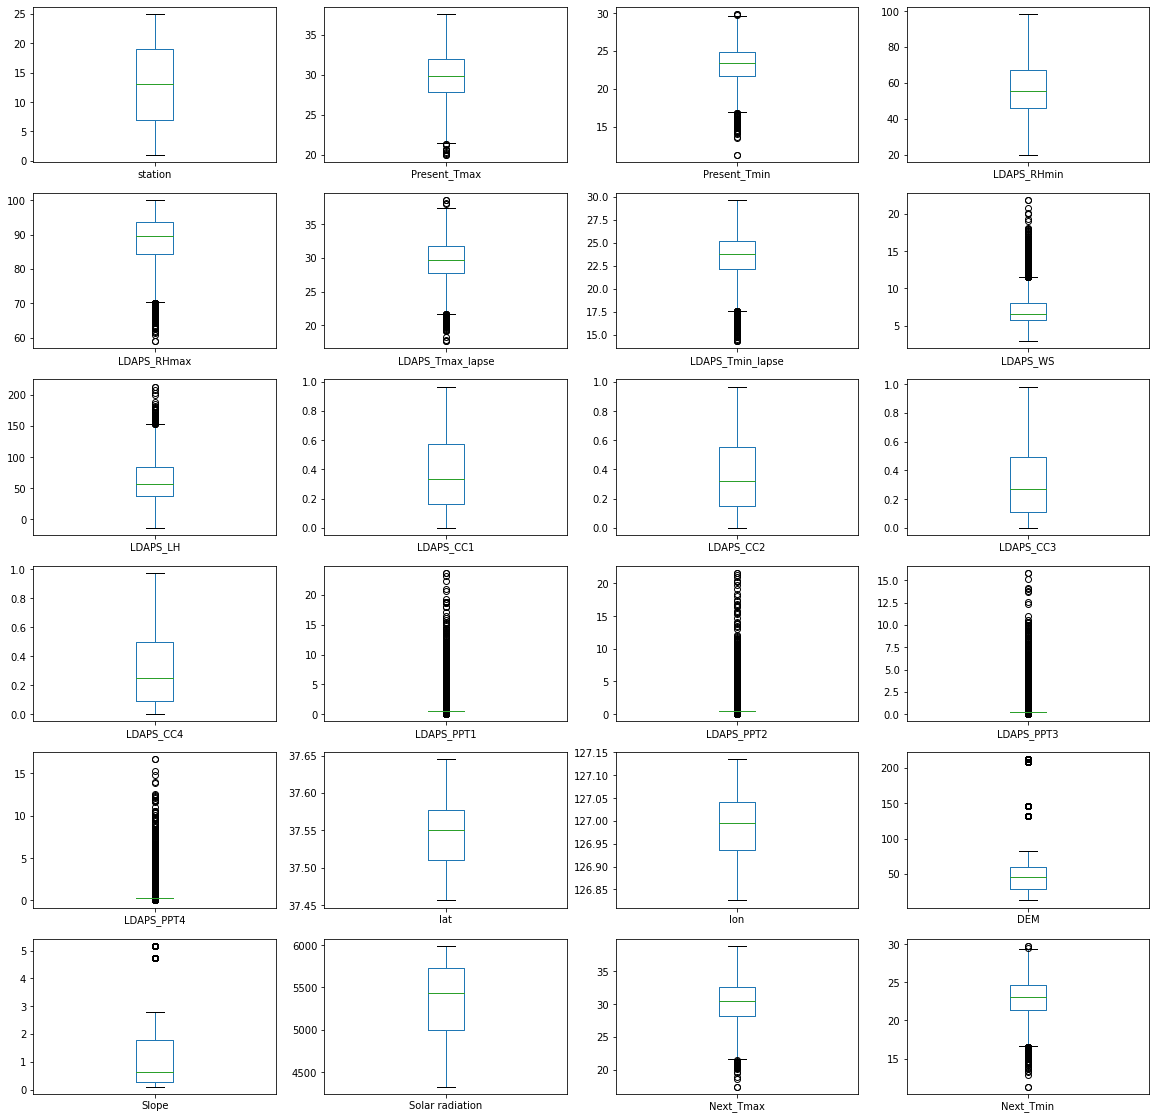

In [235]:
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20))

#### There are outliers in few columns that i will fixed it with the help of Z Score.

# Z score

In [236]:
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(6908, 24)

#### For removing the outliers i have used Z Score for few columns.
#### After removing the outliers there are 6908 rows and 24 columns in dataset.

In [237]:
# find correlation of features vs target using corrwith

df.drop('Next_Tmin',axis=1).corrwith(df.Next_Tmin)

station             0.129374
Present_Tmax        0.616781
Present_Tmin        0.784656
LDAPS_RHmin         0.132780
LDAPS_RHmax        -0.096419
LDAPS_Tmax_lapse    0.546751
LDAPS_Tmin_lapse    0.867120
LDAPS_WS           -0.014091
LDAPS_LH           -0.046104
LDAPS_CC1          -0.008022
LDAPS_CC2           0.060249
LDAPS_CC3          -0.005792
LDAPS_CC4          -0.053653
LDAPS_PPT1         -0.038432
LDAPS_PPT2         -0.004142
LDAPS_PPT3          0.031977
LDAPS_PPT4         -0.080105
lat                -0.076733
lon                -0.044608
DEM                -0.238340
Slope              -0.138172
Solar radiation     0.074943
Next_Tmax           0.584801
dtype: float64

## Visualize the correlation

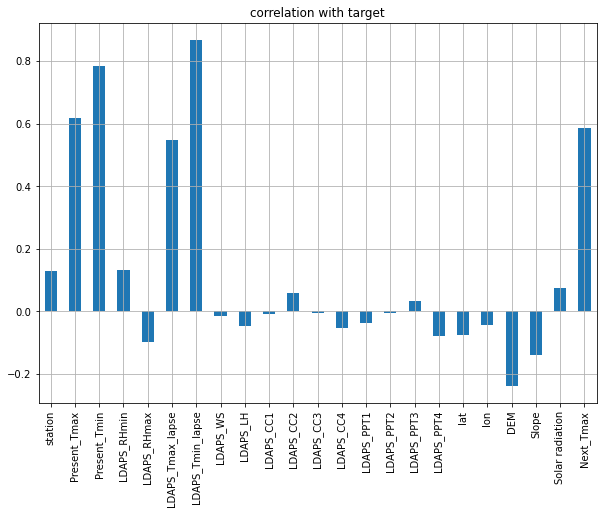

In [238]:
df.drop('Next_Tmin',axis=1).corrwith(df.Next_Tmin).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Few features are in minus value and few are positively related to label.

## StandardScaler

In [239]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66329184, -0.36132577, -0.75952931, ...,  1.11500407,
         1.51793488, -0.37628214],
       [-1.52464842,  0.72108401, -0.6762959 , ..., -0.54215762,
         1.22994952,  0.07209725],
       [-1.38600499,  0.61960809,  0.03118815, ..., -0.7231326 ,
         1.21653443,  0.26425985],
       ...,
       [ 1.66415031, -2.22171758, -2.42419767, ..., -0.71933797,
        -2.0743251 , -0.79263444],
       [-1.66329184, -3.30412736, -4.9628169 , ..., -0.8454552 ,
        -2.35821196, -4.12345278],
       [-1.66329184,  2.64912642,  2.77789093, ...,  2.86143459,
         1.51793488,  2.76237361]])

#### Applying the standard scaler to scaled the dataset in one range.

### VIF - variance inflation factor

In [240]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.236750,station
1,2.866275,Present_Tmax
2,3.115274,Present_Tmin
3,6.348436,LDAPS_RHmin
4,2.192419,LDAPS_RHmax
5,8.983772,LDAPS_Tmax_lapse
6,7.065103,LDAPS_Tmin_lapse
7,1.309268,LDAPS_WS
8,1.539441,LDAPS_LH
9,3.154397,LDAPS_CC1


#### None of the features vif score value except 1 is above 5. So i can say that Multicollinearity doesn't exist.

## Model Building

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

#### Using the train test split to divide the datset into training and testing dataset.

## Linear Regression model

In [142]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [143]:
# adjusted r2 score
rg.score(x_train,y_train)

0.8345042816917105

In [144]:
rg.score(x_test,y_test)

0.83488515037515

In [145]:
y_pred = rg.predict(x_test)
y_pred

array([19.69363273, 19.79621821, 22.48606939, ..., 24.0880304 ,
       27.21820863, 23.91255434])

### Scatter plot of Linear Regression

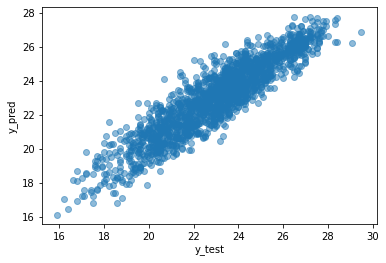

In [146]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [147]:
mean_squared_error(y_test,y_pred)

0.8930701767670212

### RMSE

In [148]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9450239027490369

### r2 score

In [149]:
r2_score(y_test,y_pred)

0.83488515037515

### Linear Regression model - 83.48%

## Random Forest Regressor Model

In [150]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [151]:
# adjusted r2 score
rf.score(x_train,y_train)

0.9857284635161274

In [152]:
rf.score(x_test,y_test)

0.901357515882969

In [153]:
y_pred = rf.predict(x_test)
y_pred

array([19.674    , 20.276    , 23.1293222, ..., 24.053    , 26.835    ,
       23.8233222])

### Scatter plot of Random Forest Regressor Model

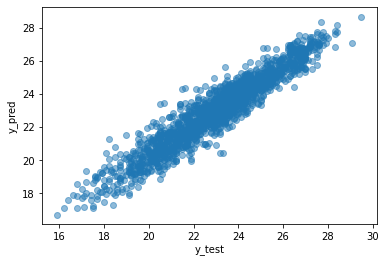

In [154]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [155]:
mean_squared_error(y_test,y_pred)

0.5335356627661947

### RMSE

In [156]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7304352556977207

### r2 score

In [157]:
r2_score(y_test,y_pred)

0.901357515882969

### Random Forest Regressor Model 90.13%

## Decision Tree Regressor Model

In [241]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [242]:
# adjusted r2 score
dt.score(x_train,y_train)

1.0

In [243]:
dt.score(x_test,y_test)

0.8070598938660507

In [244]:
y_pred = dt.predict(x_test)
y_pred

array([29.5, 33.9, 25. , ..., 32.5, 31.3, 32.7])

### Scatter plot of Decision Tree Regressor Model

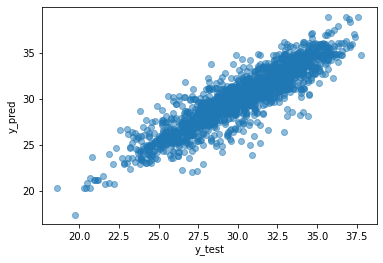

In [245]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [246]:
# checking mean squared error

mean_squared_error(y_test,y_pred)

1.9332359997254245

### RMSE

In [247]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.3904085729473277

### r2 score

In [248]:
r2_score(y_test,y_pred)

0.8070598938660507

### Decision Tree Regressor Model - 80.70%

## AdaBoost Regressor

In [250]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [251]:
# adjusted r2 score
ada.score(x_train,y_train)

0.7716122474290216

In [252]:
ada.score(x_test,y_test)

0.7705209049617104

In [253]:
y_pred = ada.predict(x_test)
y_pred

array([30.47154241, 33.10041667, 27.56195637, ..., 29.53033253,
       31.51835853, 31.05570812])

### Scatter plot of Decision Tree Regressor Model

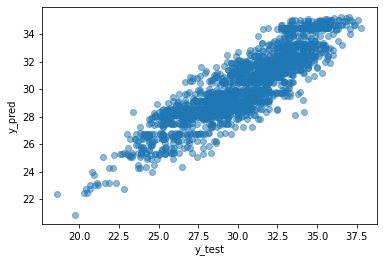

In [254]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [255]:
mean_squared_error(y_test,y_pred)

2.2993521492334867

### RMSE

In [256]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.516361483694929

### r2 score

In [257]:
r2_score(y_test,y_pred)

0.7705209049617104

## AdaBoost Regressor - 77.05%

### Hyperparameter Tuning in Random Forest Regressor Model

### Using RandomizedSearchCV method for improving the r2 score

In [172]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [173]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [174]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [175]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [176]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [177]:
prediction = rf_random.predict(x_test)

### Scatter Plot

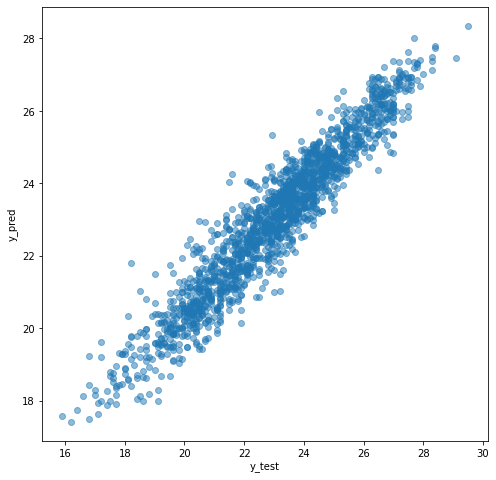

In [178]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [179]:
mean_squared_error(y_test,y_pred)

1.1120681756708846

### RMSE

In [180]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.05454643125416

### r2 score

In [181]:
r2_score(y_test,y_pred)

0.7943958107937347

#### Random Forest Regressor is the best model as r2 score is 90.13 but when i have tried the hyper parameter tuning to improve r2 score, it is working adverse as it reducing the accuracy score.So i will not include randomised seach cv prediction r2 score for model prediction.

### Regularization

In [182]:
# lasso regularization
lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [183]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [184]:
# best alphas parameters
alpha = lasscv.alpha_
alpha

2.84723803622962e-05

In [185]:
# now we have best parameter lets use the lasso regularization
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.84723803622962e-05)

In [186]:
lasso_reg.score(x_test,y_test)

0.8348826938589142

## Saving the Best Model

In [187]:
import pickle

In [188]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model is Random Forest Accuracy Score.
#### So I will Save the Random Forest Regressor as the Best Model.

## Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned Random Forest Regressor has the highest Best Score (90.13%).
### It can be clearly seen the feature engineering effects on each individual six model in 'Comparison of ML regressor with Effects of Future Engineering and r2 score.
#### I’ll briefly discuss how I approached this problem of predicting temperature.
#### a) I have temperature datastet from which I had to extract information.
#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c) After from all datasets, I preprocessed the data using replacing all zeros.
#### d) I did exploratory data analysis on main data frame and tried to see all visualizations.
#### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### g) After from all these i split the Features & Labels into 2 parts.
#### h) On this data, I have applied our machine learning models such as Linear Regression, Random Forest Reggessor,Decision Tree Regressor and AdaBoostRegressor.
#### i) After which I found Random Forest Regressor has the High r2 score(90.13%) and best amng all the models.
#### j)Based on the model scores, to predict temprature, Random Forest Regressor seems to be the best model for this dataset.